In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

pd.set_option('display.max_colwidth', -1)

In [117]:
%matplotlib inline

In [118]:
def load_crates_csv(path):
    df = pd.read_csv(path, names = ['author_date_time', 'commit', 'package_count'])
    df['author_date_time'] = pd.to_datetime(df['author_date_time'])
    df = df.set_index('author_date_time')
    return df

In [119]:
df = pd.concat([load_crates_csv('master.csv'),load_crates_csv('snapshot-2018-09-26.csv')])
df['delta'] = df.package_count.diff(-1)
df

,commit,package_count,delta
author_date_time,,,
2018-12-08 05:12:08,cf7e93e097,24160,1.0
2018-12-07 23:41:58,70ef1311bb,24159,36.0
2018-12-06 23:50:19,3a0a1996d2,24123,26.0
2018-12-05 23:50:25,8a7d40451f,24097,19.0
2018-12-04 23:52:00,ce1c4fb09e,24078,16.0
2018-12-03 22:55:13,d7c85ba9a4,24062,31.0
2018-12-02 23:40:03,c06f2c599a,24031,29.0
2018-12-01 23:56:50,177b3842e5,24002,13.0
2018-11-30 23:55:09,801426056b,23989,24.0


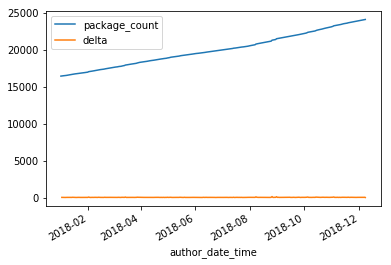

In [120]:
df.plot()

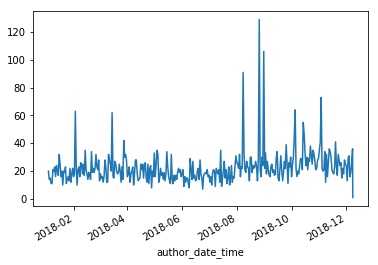

In [121]:
df.delta.plot()

In [122]:
df = df.reset_index()
df['weekday'] = df['author_date_time'].dt.weekday

In [123]:
df[['commit', 'weekday']].groupby('weekday').count()

,commit
weekday,
0,48
1,50
2,50
3,48
4,50
5,49
6,48
